# Atividade 1

Escolher qualquer corpus (conjunto de documentos) ou livro de até 100 MB
em português e extrair as seguintes informaçoes:

- Quantidade de palavras distintas;
- Histograma das palavras;
- Histograma de prefixos de tamanho (1,2,3,4 e 5)
- Histograma de sufixos de tamanho (1,2,3,4 e 5)

O Corpus pode ser encontrado na pasta Corpus do projeto 1.

# Observação

O código abaixo foi escrito apenas com python 3 e as bibliotecas "os" para ler arquivos de uma pasta e "matlotlib" para criar o gráfico de frequências de palavras.

Para observar o relatório elaborado com base neste projeto confira a página no meu site pessoal: 


In [100]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import bar_chart_race as bcr
import pandas as pd

In [101]:
def load_filepaths(path):
    '''
    Loads all the filepaths in a directory into a list
    path: path to the directory
    '''
    filepaths = []
    for root, dirs, files in os.walk(path):
        for filename in files:
            if filename.endswith(".txt"):
                filepaths.append(os.path.join(root, filename))
    return filepaths

In [102]:
def read_txt(filepath):
    '''
    Opens a text file and reads its data
    filepath: path to the text file
    '''
    with open(filepath, "r", encoding="ISO-8859-1") as f:
        data = f.read()
    return data

In [103]:
def split_text(text):
    '''
    Splits the text into a list of words in lowercase
    text: text to be split
    '''
    words = text.split()
    words = [word.lower() for word in words if word.isalpha()]
    return words

In [104]:

def count_words(words):
    '''
    Count the number of times each word appears in a list of words
    words: list of words
    '''
    word_counts = {}
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1
    word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    return word_counts

In [105]:
def plot_histogram(word_counts, filename):
    '''
    Plots a histogram of the word counts
    word_counts: list of word counts
    filename: name of the file to be in the title the histogram
    '''
    word_counts.reverse() # Reverse the list to present the most common word first 
    words, counts = zip(*word_counts)
    plt.barh(words, counts)
    plt.title(filename + "\n Word Frequency")
    plt.xlabel("Count")
    plt.ylabel("Word")
    plt.show()

In [106]:
def get_n_letter_prefix(words, n):
    '''
    Get the n-letter prefixes of a list of words
    words: list of words
    n: number of letters in the prefix
    '''
    prefixes = []
    for word in words:
        if not len(word[0:n]) < n:
            prefixes.append(word[0:n])
    return prefixes

In [107]:
def get_n_letter_sufix(words, n):
    '''
    Get the n-letter sufixes of a list of words
    words: list of words
    n: number of letters in the sufixes
    '''
    prefixes = []
    for word in words:
        if not len(word[-n:]) < n:
            prefixes.append(word[-n:])
    return prefixes

In [108]:
# Read the whole corpus and create a list of words
filepaths = load_filepaths("./corpus")
text = ""
for file in filepaths:
    text += read_txt(file)
words = split_text(text)

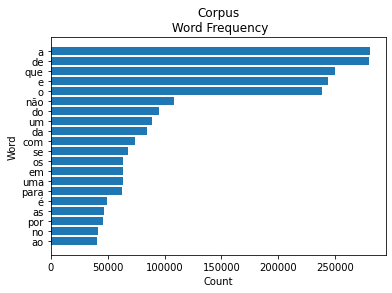

In [109]:
# plot a histogram of the word frequency and word for the top 20 words that appears in ethe whole corpus
plot_histogram(count_words(words)[0:20], "Corpus")

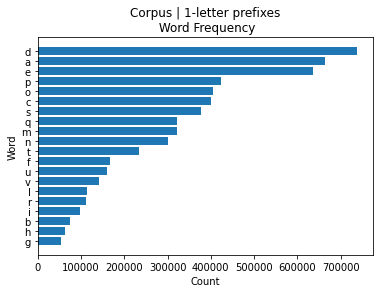

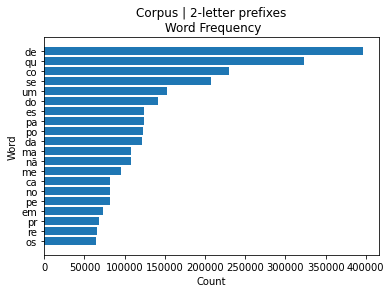

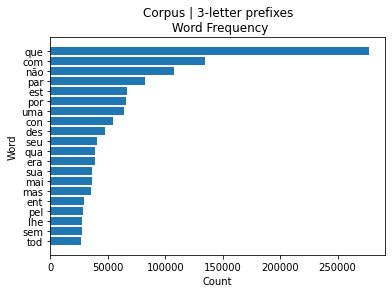

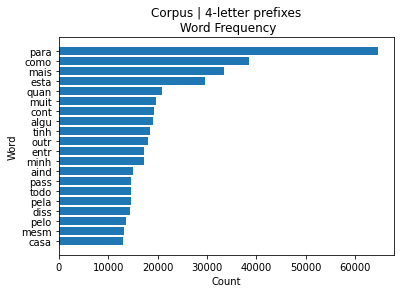

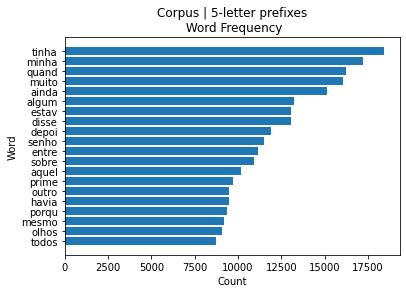

In [110]:
# plot a histogram of the word frequency and word for the top 20 n-letter prefixes that appears in ethe whole corpus
for i in range(1,6):
    prefixes = get_n_letter_prefix(words, i)
    prefixes = count_words(prefixes)[0:20]
    plot_histogram(prefixes, f"Corpus | {i}-letter prefixes")

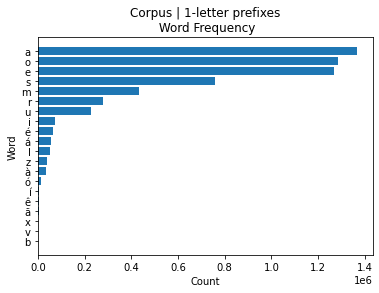

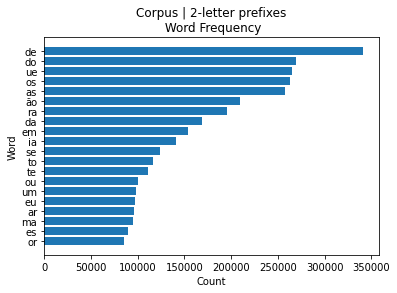

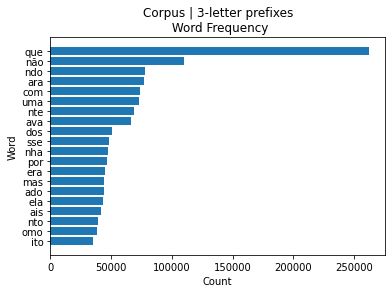

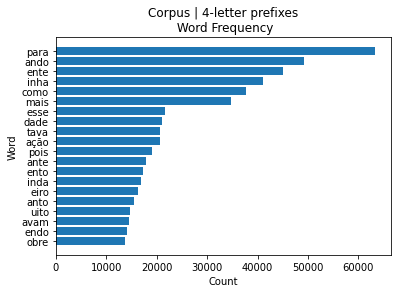

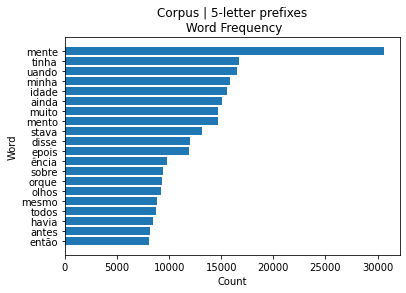

In [111]:
# plot a histogram of the word frequency and word for the top 20 n-letter sufixes that appears in ethe whole corpus
for i in range(1,6):
    sufixes = get_n_letter_sufix(words, i)
    sufixes = count_words(sufixes)[0:20]
    plot_histogram(sufixes, f"Corpus | {i}-letter prefixes")


# plot a histogram of the word frequency and word for the top 20 words that appears in each document in the corpus
filepaths = load_filepaths("./corpus")
for file in filepaths:
    text = read_txt(file)
    words = split_text(text)
    words = count_words(words)[0:20]
    words.reverse()
    filename = os.path.basename(file).rsplit('.', 1)[0]
    plot_histogram(words, filename)

In [125]:
from collections import defaultdict

words
unique_words = set(words)
columns = {}
for word in set(words):
    columns[word] = 0
data = {}
for i in range(len(words)):
    data[i] = columns.copy()
    data[i][words[i]] = data[i][words[i]] + 1
data


: 

: 